<a href="https://colab.research.google.com/github/HariPrabu741/LGMVIP-DataScience/blob/main/Stock_Market_Prediction_And_Forecasting_Using_Stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error

In [2]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

In [3]:
df = pd.read_csv(url)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
df.sort_values(by=['Date'],inplace=True)

In [6]:
df.reset_index(drop=True, inplace=True)

In [7]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [8]:
new_df = df.loc[:,'Close']

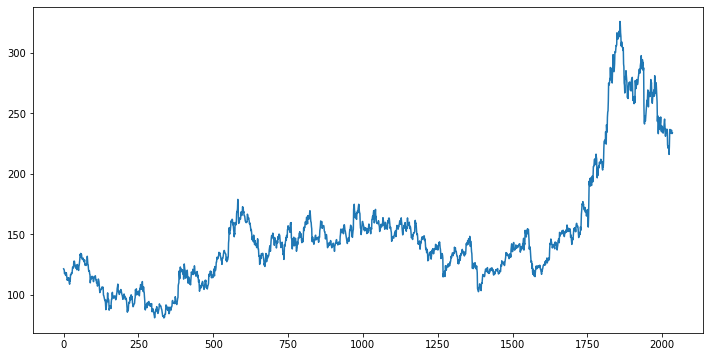

In [9]:
plt.figure(figsize=(12,6))
plt.plot(new_df)
plt.show()

In [10]:
#lstm is sensitive to scalled data. so, normalization is done on it

sc_df = MinMaxScaler()

In [11]:
df_1 = sc_df.fit_transform(np.array(new_df).reshape(-1,1))

In [12]:
print(df_1)

[[0.16584967]
 [0.16319444]
 [0.1621732 ]
 ...
 [0.62622549]
 [0.62214052]
 [0.62418301]]


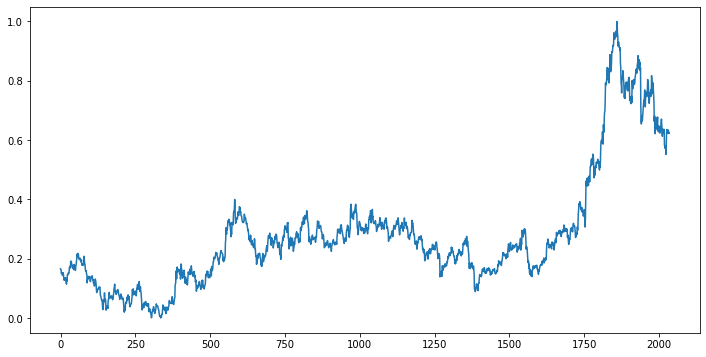

In [13]:
plt.figure(figsize=(12,6))                # cost are scalled between 0 to 1
plt.plot(df_1)
plt.show()

In [14]:
# Splitting the data --- 

train_size = np.round(len(df_1)*0.7)
train_size

1424.0

In [15]:
train_df = df_1[0:1424,:]
test_df = df_1[1424:,]

In [16]:
print(len(train_df))
print(len(test_df))

1424
611


In [17]:
def create_data(data, timestep):
  x_data, y_data = [], []
  for i in range(len(data)-timestep-1):
    a = data[i:(i+timestep),0]
    x_data.append(a)
    y_data.append(data[(i+timestep),0])
  return np.array(x_data), np.array(y_data)

In [18]:
xtrain, ytrain = create_data(train_df, 100)

In [19]:
xtest, ytest = create_data(test_df, 100)

In [20]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1323, 100)
(510, 100)
(1323,)
(510,)


In [21]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

In [23]:
print(xtrain.shape)
print(xtest.shape)

(1323, 100, 1)
(510, 100, 1)


In [25]:
# Creating LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=20)

Epoch 1/20
42/42 [==============================] - 14s 104ms/step - loss: 0.0048 - val_loss: 0.0079
Epoch 2/20
42/42 [==============================] - 3s 77ms/step - loss: 9.2654e-04 - val_loss: 0.0039
Epoch 3/20
42/42 [==============================] - 3s 76ms/step - loss: 9.2349e-04 - val_loss: 0.0034
Epoch 4/20
42/42 [==============================] - 3s 76ms/step - loss: 8.1116e-04 - val_loss: 0.0026
Epoch 5/20
42/42 [==============================] - 3s 77ms/step - loss: 7.2114e-04 - val_loss: 0.0023
Epoch 6/20
42/42 [==============================] - 3s 76ms/step - loss: 8.0392e-04 - val_loss: 0.0036
Epoch 7/20
42/42 [==============================] - 3s 76ms/step - loss: 6.3224e-04 - val_loss: 0.0042
Epoch 8/20
42/42 [==============================] - 3s 76ms/step - loss: 5.9888e-04 - val_loss: 0.0039
Epoch 9/20
42/42 [==============================] - 3s 77ms/step - loss: 5.2880e-04 - val_loss: 0.0049
Epoch 10/20
42/42 [==============================] - 3s 76ms/step - loss: 4

In [27]:
# predicting the model
train_pred = model.predict(xtrain)
test_pred = model.predict(xtest)

In [28]:
#inverse transforming the values
train_pred = sc_df.inverse_transform(train_pred)
test_pred = sc_df.inverse_transform(test_pred)

In [29]:
#Finding root mean squared error (lower the value is good performance of model)
print(math.sqrt(mean_squared_error(ytrain,train_pred)))
print(math.sqrt(mean_squared_error(ytest,test_pred)))

133.81253907192556
201.38600286866662


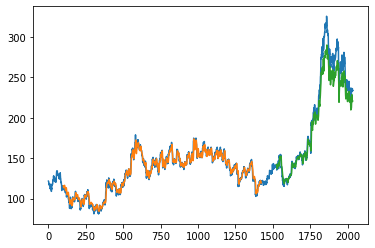

In [39]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df_1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred)+look_back, :] = train_pred
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_pred)+(look_back*2)+1:len(df_1)-1, :] = test_pred
# plot baseline and predictions
plt.plot(sc_df.inverse_transform(df_1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()